<a href="https://colab.research.google.com/github/Sneha2059/Machine_Learning/blob/main/masterLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Classification Program just to predict
import pandas as pd
df = pd.read_csv('music.csv')
# X = df.drop(columns = ['genre'])
X = df[['age', 'gender']]
y = df['genre']
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X.values, y.values)
print(model.predict([[21,1]]))
df

['HipHop']


,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [ ]:
df.shape

(18, 3)

In [ ]:
## use dtypes to check whether to apply for regression or classification
df.dtypes

,0
age,int64
gender,int64
genre,object


In [ ]:
X= df.drop(columns='genre')
y=df['genre']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
model.fit(X.values,y.values)

DecisionTreeClassifier()

In [ ]:
model.predict([[22,1]])

array(['HipHop'], dtype=object)

In [ ]:
## Binary search
## linear search


In [ ]:
## graph searching
#Graph Searching: Depth-First Search(DFS)
graph = {
    'A' : ['B','C'],
    'B' : ['D','E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}
def dfs(graph, start, visited=  None):      #def dfs(graph, start, visited = None)
  if visited is None:             #True
    visited = set()               # visited = {}
  visited.add(start)               # visited = {A}    {A,}
  print(start)                     # A
  for neighbor in graph[start]:    # for neighbor in B, C
    if neighbor not in visited:    #if B not in visited:      True
      dfs(graph, neighbor, visited)# dfs(graph, B, {A})
dfs(graph, 'A')

A
B
D
E
F
C


In [ ]:
# Breadth First Search
from collections import deque     #double ended queue     heapq
graph = {
    'A' : ['B','C'],
    'B' : ['D','E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}
def bfs(graph, start):
  visited = set()
  queue = deque([start])    #     A

  while queue:
    vertex = queue.popleft()        #vertex = A
    if vertex not in visited:        #{}
      print(vertex)                 #A
      visited.add(vertex)           #{A}
      for neighbor in graph[vertex]:
        if neighbor not in visited:
          queue.extend(neighbor)
bfs(graph, 'A' )

A
B
C
D
E
F


In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
data=digits.data

In [ ]:
#import matplotlib.pyplot as plt
#plt.imshow


In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10, random_state=42)
kmeans.fit(data)
clusters=kmeans.predict(data)


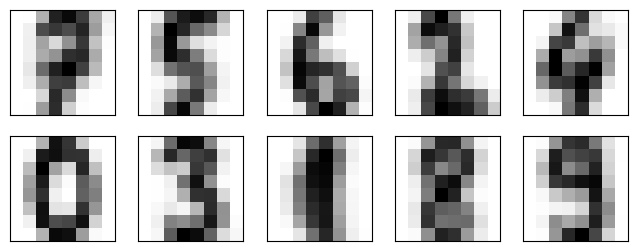

In [ ]:
# Clustering(Hard Clustering/KmeansClustering)
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()
data = digits.data         # X
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(data)
clusters = kmeans.predict(data)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks = [])
  axi.imshow(center,cmap = plt.cm.binary)
plt.show()

In [ ]:
pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install tensorflow

In [ ]:
##gradio

In [ ]:
from tensorflow import keras
import numpy as np
data=keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels)= data.load_data(num_words=88000)
word_index = data.get_word_index()
word_index={k:v+3 for k,v in word_index.items()}
word_index['<PAD>']=0
word_index['<START>']=1
word_index['<UNK>']=2
word_index['<UNUSED>']=3
reverse_word_index=dict([(value,key) for key, value in word_index.items()])
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index['<PAD>'],padding='post',maxlen=250)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=word_index['<PAD>'],padding='post',maxlen=250)

In [ ]:
def decode_review(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [ ]:
model=keras.Sequential([
    keras.layers.Embedding(88000,16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(train_data,train_labels,epochs=20)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6238 - loss: 0.6506
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8704 - loss: 0.3407
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9104 - loss: 0.2373
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9329 - loss: 0.1841
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9479 - loss: 0.1513
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9587 - loss: 0.1233
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9703 - loss: 0.0981
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9762 - loss: 0.0832
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9778 - loss: 0.0714
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9848 - loss: 0.0546
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9850 - loss: 0.0525
Epoch 12/20
782/782 ━━━━━━━━━━

In [ ]:
DAY 2

In [ ]:
# CNN cifar10 classification
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers

In [ ]:
(train_images, train_labels),(test_images, test_labels)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
class_names=['airplane', 'automobile','bird', 'cat','deer','dog','frog','horse','ship','truck']

In [ ]:
model=keras.Sequential([
   layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64,(3,3), activation='relu'),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64,(3,3),activation='relu'),

])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

train_images,test_images=train_images/255.0,test_images/255.0

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# IMG_INDEX=1
# plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
# plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
# plt.show()

model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=4,validation_data=(test_images,test_labels))

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

for i in range(10):
	plt.imshow(train_images[i],cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i][0]])
	plt.show()

In [ ]:
## RNN
import keras.preprocessing.text
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import os
import numpy as np

VOCAB_SIZE=88000
MAXLEN=250
BATCH_SIZE=64

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=VOCAB_SIZE)

# train_data[0]
# len(train_data[0])

train_data=sequence.pad_sequences(train_data,MAXLEN)
test_data=sequence.pad_sequences(test_data,MAXLEN)
# train_data[1]

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE,32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# model.summary()

model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['acc'])
history=model.fit(train_data,train_labels,epochs=10,validation_split=0.2)

results=model.evaluate(test_data,test_labels)
# print(results)

word_index=imdb.get_word_index()

def encode_text(text):
    tokens=keras.preprocessing.text.text_to_word_sequence(text)
    tokens=[word_index[word] if word in word_index else 0 for word in tokens]
    return sequence.pad_sequences([tokens],MAXLEN)[0]

text="that movie was so amazing, so amazing"
encoded=encode_text(text)
print(encoded)

reverse_word_index={value:key for (key,value) in word_index.items()}

def decode_integers(integers):
    PAD=0
    text=""
    for num in integers:
        if num!=PAD:
            text+=reverse_word_index[num]+""

    return text[:-1]
print(decode_integers(encoded))

def predict(text):
    encoded_text=encode_text(text)
    pred=np.zeros((1,250))
    pred[0]=encoded_text
    result=model.predict(pred)
    print(result[0])

positive_review="That movie was so awesome!, I really love it and would watch it again because it was great"
predict(positive_review)

negative_review="that movie shocked. I hated it and wouldn't watch it again. was one of the worst movie watched"
predict(negative_review)

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
import tensorflow as tf
import os
import numpy as np

path_to_file=tf.keras.utils.get_file('Shakespeare.txt','https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

text=open(path_to_file,'rb').read().decode(encoding='utf-8')
print('Length of text: {} characters'.format(len(text)))
# print(text[:250])

vocab=sorted(set(text))

char2idx={u:i for i,u in enumerate(vocab)}
idx2char=np.array(vocab)

def text_to_int(text):
    return np.array([char2idx[c] for c in text])

text_as_int=text_to_int(text)
# print("Text:",text[:13])
# print("Encoded:",text_to_int(text[:13]))

def int_to_text(ints):
    try:
        ints=ints.numpy()
    except:
        pass
    return ''.join(idx2char[ints])
print(int_to_text(text_as_int[:13]))

seq_length=100
examples_per_epoch=len(text)//(seq_length+1)

char_dataset= tf.data.Dataset.from_tensor_slices(text_as_int)

sequences=char_dataset.batch(seq_length+1,drop_remainder=True)

def split_input_target(chunk):
    input_text=chunk[:-1]
    target_text=chunk[1:]
    return input_text,target_text
dataset=sequences.map(split_input_target)

for x,y in dataset.take(2):
    print("\n\nEXAMPLE\n")
    print("INPUT")
    print(int_to_text(x))
    print("\nOUTPUT")
    print(int_to_text(y))

BATCH_SIZE=64
VOCAB_SIZE=len(vocab)
EMBEDDING_DIM=256
RNN_UNITS=1024

BUFFER_SIZE=10000
data=dataset.shuffle(BATCH_SIZE).batch(BATCH_SIZE,drop_remainder=True)

def build_model(vocab_size,embedding_dim,rnn_units,batch_size):
    model=keras.Sequential([
        keras.layers.Embedding(vocab_size,embedding_dim,batch_input_shape=[batch_size,None]),
        keras.layers.LSTM(rnn_units,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'),
        keras.layers.Dense(vocab_size)
    ])
    return model

model=build_model(VOCAB_SIZE,EMBEDDING_DIM,RNN_UNITS,BATCH_SIZE)
model.summary()

for input_example_batch,target_example_batch in data.take(1):
    example_batch_predictions=model(input_example_batch)
    print(example_batch_predictions.shape,"#(batch_size,sequence_length,vocab_size)")

# print(len(example_batch_predictions))
# print(example_batch_predictions)

pred=example_batch_predictions[0]
# print(len(pred))
# print(pred)

In [ ]:
!pip install tflearn
import tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=1499d1925e3321f91d2d46783360ba3e1321cd73f54d90e74d4d951abb44af24
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


Instructions for updating:
non-resource variables are not supported in the long term


ImportError: cannot import name 'is_sequence' from 'tensorflow.python.util.nest' (/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/nest.py)

In [ ]:
!pip uninstall tflearn
!pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing!

Found existing installation: tflearn 0.5.0
Uninstalling tflearn-0.5.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/tflearn-0.5.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tflearn/*
Proceed (Y/n)? y
  Successfully uninstalled tflearn-0.5.0
  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing!) to /tmp/pip-req-build-gtsz61c9
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-gtsz61c9
  Running command git checkout -q 'fix/is_sequence_missing!'
  error: pathspec 'fix/is_sequence_missing!' did not match any file(s) known to git
  error: subprocess-exited-with-error
  
  × git checkout -q 'fix/is_sequence_missing!' did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git checkout -q 'fix/is_sequence_missing!' did not 

In [ ]:
y
!pip uninstall tflearn
!pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing!

  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing!) to /tmp/pip-req-build-fd7dzo3q
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-fd7dzo3q
  Running command git checkout -q 'fix/is_sequence_missing!'
  error: pathspec 'fix/is_sequence_missing!' did not match any file(s) known to git
  error: subprocess-exited-with-error
  
  × git checkout -q 'fix/is_sequence_missing!' did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git checkout -q 'fix/is_sequence_missing!' did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip uninstall Pillow
!pip uninstall tflearn

Found existing installation: Pillow 9.5.0
Uninstalling Pillow-9.5.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/PIL/*
    /usr/local/lib/python3.10/dist-packages/Pillow-9.5.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libXau-154567c4.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libbrotlicommon-92722cb2.so.1
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libbrotlidec-db4b3db6.so.1.0.9
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libfreetype-cb9caf6f.so.6.19.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libharfbuzz-3543f599.so.0.60710.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libjpeg-f2134fdd.so.62.3.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/liblcms2-12745711.so.2.0.15
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/liblzma-95592ee6.so.5.4.2
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libopenjp2-78c47f58.so.2.5.0
    /usr/local/lib/python3.10/d

In [ ]:
!pip install Pillow==9.5.0
!pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing

  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)


  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing) to /tmp/pip-req-build-ylz7i4bz
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-ylz7i4bz
  Running command git checkout -b fix/is_sequence_missing --track origin/fix/is_sequence_missing
  Switched to a new branch 'fix/is_sequence_missing'
  Branch 'fix/is_sequence_missing' set up to track remote branch 'fix/is_sequence_missing' from 'origin'.
  Resolved https://github.com/MihaMarkic/tflearn.git to commit 6472b8588e758ff4a33a2764d4ee638bbd0e42f0
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=130659 sha256=78df6b1de837b66d5ff4c390c11ca46d708468619c9e28b2ae6e35e98592b7f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-k5vf3qi8/wheels/4d/8c/0c/2159783f8dfd53bdaf4e59cd3990607ac8d5d912ae6de88296
Successfully built tflearn


In [ ]:
!pip install tflearn

In [ ]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
nltk.download('punkt_tab')
stemmer= LancasterStemmer()
import numpy
import tensorflow
import random
import json
import pickle
import tflearn

with open('/content/intents.json') as file:
  data= json.load(file)

try:
	with open("data.pickle","rb") as f:
		words,labels,training,output=pickle.load(f)

except:
	words=[]
	labels=[]
	docs_x=[]
	docs_y=[]

	for intent in data["intents"]:
		for pattern in intent["patterns"]:
			wrds=nltk.word_tokenize(pattern)
			words.extend(wrds)
			docs_x.append(wrds)
			docs_y.append(intent["tag"])

		if intent["tag"] not in labels:
			labels.append(intent["tag"])

	words=[stemmer.stem(w.lower()) for w in words if w != "?"]
	words=sorted(list(set(words)))
	labels=sorted(labels)

	training=[]
	output=[]

	out_empty=[0 for _ in range(len(labels))]

	for x,doc in enumerate(docs_x):
		bag=[]
		wrds=[stemmer.stem(w) for w in doc]

		for w in words:
			if w in wrds:
				bag.append(1)
			else:
				bag.append(0)

		output_row=out_empty[:]
		output_row[labels.index(docs_y[x])]=1

		training.append(bag)
		output.append(output_row)

training=numpy.array(training)
output=numpy.array(output)

training = numpy.array(training)
output=numpy.array(output)
with open('data.pickle','wb') as f:
  pickle.dump((words,labels,training,output),f)

tensorflow.compat.v1.reset_default_graph()
net = tflearn.input_data(shape=[None, len(training[0])])
net= tflearn.fully_connected(net,8)
net= tflearn.fully_connected(net,8)
net=tflearn.fully_connected(net,len(output[0]), activation='softmax')
net=tflearn.regression(net)
model=tflearn.DNN(net)
model.fit(training, output, n_epoch=1200, batch_size= 12, show_metric=True)

def bag_of_words(s,words):
	bag=[0 for _ in range(len(words))]
	s_words=nltk.word_tokenize(s)
	s_words=[stemmer.stem(word.lower()) for word in s_words]

	for se in s_words:
		for i,w in enumerate(words):
			if w==se:
				bag[i]=1

	return numpy.array(bag)


def chat():
	print("Start talking with BOT of Kutumba Hotel")
	while True:
		inp=input("YOU:")
		print(" ")
		if inp.lower()=="quit":
			break
		results=model.predict([bag_of_words(inp,words)])[0]
		results_index=numpy.argmax(results)
		tag=labels[results_index]
		# print(tag)
		# print(results)

		if results[results_index]>0.4:
			for tg in data["intents"]:
				if tg["tag"]==tag:
					responses=tg['responses']
			print(random.choice(responses))
			print(' ')
			print(' ')
		else:
			print("I didn't get this, try again")
			print(" ")
			print(" ")
chat()

import gradio
def chat(Hotel_kutumba_Chatbot):
    results = model.predict([bag_of_words(Hotel_kutumba_Chatbot), words])[0]
    results_index = numpy.argmax(results)
    tag = labels[results_index]
    if results[results_index] > 0.7:
        for tg in data['intents']:
            if tg['tag'] == tag:
                responses = tg['responses']
        return random.choice(responses)
    else:
        return 'I dont understand. try again'

demo = gradio.Interface(fn = chat, inputs = 'text', outputs = 'text')
demo.launch(share = True)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
with open('/content/intents.json') as file:
  data= json.load(file)

In [ ]:
try:
	with open("data.pickle","rb") as f:
		words,labels,training,output=pickle.load(f)

except:
	words=[]
	labels=[]
	docs_x=[]
	docs_y=[]

	for intent in data["intents"]:
		for pattern in intent["patterns"]:
			wrds=nltk.word_tokenize(pattern)
			words.extend(wrds)
			docs_x.append(wrds)
			docs_y.append(intent["tag"])

		if intent["tag"] not in labels:
			labels.append(intent["tag"])

	words=[stemmer.stem(w.lower()) for w in words if w != "?"]
	words=sorted(list(set(words)))
	labels=sorted(labels)

	training=[]
	output=[]

	out_empty=[0 for _ in range(len(labels))]

	for x,doc in enumerate(docs_x):
		bag=[]
		wrds=[stemmer.stem(w) for w in doc]

		for w in words:
			if w in wrds:
				bag.append(1)
			else:
				bag.append(0)

		output_row=out_empty[:]
		output_row[labels.index(docs_y[x])]=1

		training.append(bag)
		output.append(output_row)

training=numpy.array(training)
output=numpy.array(output)



In [ ]:
training = numpy.array(training)
output=numpy.array(output)
with open('data.pickle','wb') as f:
  pickle.dump((words,labels,training,output),f)



In [ ]:
tensorflow.compat.v1.reset_default_graph()
net = tflearn.input_data(shape=[None, len(training[0])])
net= tflearn.fully_connected(net,8)
net= tflearn.fully_connected(net,8)
net=tflearn.fully_connected(net,len(output[0]), activation='softmax')
net=tflearn.regression(net)
model=tflearn.DNN(net)
model.fit(training, output, n_epoch=1200, batch_size= 12, show_metric=True)

Training Step: 11999  | total loss: 0.00045 | time: 0.031s
| Adam | epoch: 1200 | loss: 0.00045 - acc: 1.0000 -- iter: 108/113
Training Step: 12000  | total loss: 0.00044 | time: 0.034s
| Adam | epoch: 1200 | loss: 0.00044 - acc: 1.0000 -- iter: 113/113
--


In [ ]:
def bag_of_words(s,words):
	bag=[0 for _ in range(len(words))]
	s_words=nltk.word_tokenize(s)
	s_words=[stemmer.stem(word.lower()) for word in s_words]

	for se in s_words:
		for i,w in enumerate(words):
			if w==se:
				bag[i]=1

	return numpy.array(bag)


def chat():
	print("Start talking with BOT of Kutumba Hotel")
	while True:
		inp=input("YOU:")
		print(" ")
		if inp.lower()=="quit":
			break
		results=model.predict([bag_of_words(inp,words)])[0]
		results_index=numpy.argmax(results)
		tag=labels[results_index]
		# print(tag)
		# print(results)

		if results[results_index]>0.4:
			for tg in data["intents"]:
				if tg["tag"]==tag:
					responses=tg['responses']
			print(random.choice(responses))
			print(' ')
			print(' ')
		else:
			print("I didn't get this, try again")
			print(" ")
			print(" ")
chat()





Start talking with BOT of Kutumba Hotel
YOU:Hi
 
Hello. Let me know if you need anything- I'm happy to help.
 
 
YOU:Where are you located?
 
We are located here in Bakhundole
 
 
YOU:Quit
 


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio
def chat(Hotel_kutumba_Chatbot):
    results = model.predict([bag_of_words(Hotel_kutumba_Chatbot), words])[0]
    results_index = numpy.argmax(results)
    tag = labels[results_index]
    if results[results_index] > 0.7:
        for tg in data['intents']:
            if tg['tag'] == tag:
                responses = tg['responses']
        return random.choice(responses)
    else:
        return 'I dont understand. try again'

demo = gradio.Interface(fn = chat, inputs = 'text', outputs = 'text')
demo.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f5c10b2b80fb069591.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
## nltk----> natural language tool kit ## prelearning for nltk package

In [ ]:
#!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
example_word='I want to tokenize, this sentence!'
word_token=word_tokenize(example_word)
word_token

['I', 'want', 'to', 'tokenize', ',', 'this', 'sentence', '!']

In [ ]:
example_sentence= "hello guys! we are having a DS session."
sent_token= sent_tokenize(example_sentence)
sent_token

['hello guys!', 'we are having a DS session.']

In [ ]:
## stopwords --> removes unnecessary words
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words= set(stopwords.words('english'))
filter_sentence=[]
for w in word_token:
  if w not in stop_words:
    filter_sentence.append(w)
filter_sentence

['I', 'want', 'tokenize', ',', 'sentence', '!']

In [ ]:
# stemming ---> removes prefix/suffix
from nltk.stem import PorterStemmer
ps= PorterStemmer()
example_test='Playing ludo is a funny activity.'
words=word_tokenize(example_test)
for w in words:
  print(ps.stem(w))

play
ludo
is
a
funni
activ
.


In [ ]:
# stemming ---> removes prefix/suffix
from nltk.stem import LancasterStemmer
ls= LancasterStemmer()
example_test='Playing ludo is a funny activity.'
words=word_tokenize(example_test)
for w in words:
  print(ls.stem(w))

play
ludo
is
a
funny
act
.


In [ ]:
## Lemmatization(plural --> singular, verbs--> v1)
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
print(lemmatizer.lemmatize('feet'))
print(lemmatizer.lemmatize('loving','v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


foot
love


In [ ]:
# Pos tag(part of speech), NER(Named-Entity-Recognizer)

In [ ]:
100+30+80+75+70+90+70+7*20

655